In [5]:
test = 1

In [8]:
x = 1 if test == 1

SyntaxError: invalid syntax (3770833543.py, line 1)

In [7]:
x

1

In [6]:
test_path = '/home/euiseokjeong/Desktop/munus_test'

In [34]:
def minus_name(path, extension, minus_num = -1):
    file_list = os.listdir(path)
    file_list = [int(x.replace(f'.{extension}','')) for x in file_list if extension in x.split('.')]
    file_list.sort()
    for file in file_list:
#         file_name = int(file.split('.')[0])
        source = os.path.join(path, f'{file}.{extension}')
        dest = os.path.join(path, f'{file+minus_num}.{extension}')
        os.rename(source, dest)
minus_name(test_path, 'npy')

In [37]:
from glob import glob
cropped_aligned_path = '/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned'
dir_list = glob(os.path.join(cropped_aligned_path, '*'))
for i, dir in enumerate(dir_list):
    print(i, dir)
    minus_name(dir, 'jpg')

/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/119
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video44
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/138
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/86-24-1920x1080
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video48
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/204
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video45_4
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/162
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/423
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video45_3
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video49_right
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/66-25-1080x1920
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video26
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_al

In [24]:
import numpy as np
_8033 = np.load('/home/euiseokjeong/Desktop/munus_test/8033.npy')
_8034 = np.load('/home/euiseokjeong/Desktop/munus_test/8034.npy')

In [30]:
_8033_ = np.load('/home/euiseokjeong/Desktop/munus_test/8033.npy')

In [31]:
_8033_ == _8034

array([[[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]]])

In [1]:
import cv2
import tensorflow as tf
import numpy as np
from utils import get_metric, get_loss, update_dict, check_dir, save_pickle, check_and_limit_gpu, check_weight
from models import get_model
import time
from dataloader import dataloader
# from config import configs
import os
import shutil
import warnings
from silence_tensorflow import silence_tensorflow
import sys

In [2]:
from config import configs

In [17]:
configs['classifier_layers'] = [256,128]
configs['feature_extractor_layers'] = [1024,512]

In [18]:
model = get_model(configs)
tmp= model(np.zeros((1,6,1,512)), np.zeros((1,1000)))
model.load_weights('/home/euiseokjeong/Desktop/IMLAB/ABAW/result/keep/teacher_test/2022_2_25_20_22_44/weight/best_weight_gen_0.h5')

In [19]:
from dataloader import dataloader
from trainer import Trainer
trainer = Trainer(configs)
silence_tensorflow()
warnings.filterwarnings(action='ignore')
trainer.valid(trainer.valid_dataloader, model, 1)

[INFO] Load existing idx pickle file in /home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_train_vid(2)_str(10).pickle
[INFO] Load existing idx pickle file in /home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_valid_vid(2)_str(10).pickle

       (01466/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.11/0.50/0.18 time: 258.54sec     (00601/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.10/0.66/0.20 time: 98.56sec      (01250/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.11/0.52/0.20 time: 216.16sec

KeyboardInterrupt: 

In [5]:
img_input = tf.keras.Input(shape=(6, 1, 512))
audio_input = tf.keras.Input(shape=(1000))
tmp_model =  tf.keras.Model(inputs=[img_input, audio_input], outputs=model.call(img_input, audio_input))


In [6]:
tmp_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1, 512)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 feature_extractor_1 (feature_e  (None, 256)         5697024     ['input_1[0][0]',                
 xtractor)                                                        'input_2[0][0]']                
                                                                                                  
 classifier_3 (classifier)      (None, 2)            50690       ['feature_extractor_1[0][0]

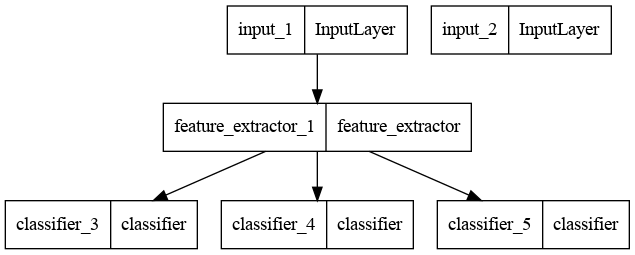

In [7]:
tf.keras.utils.plot_model(tmp_model)

In [8]:
tmp_model.save(os.path.join(os.getcwd(), 'tmp_model.h5'))

NotImplementedError: 